# Main Jupyter Notebook

## Data preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from dython import nominal
sb.set()

from importnb import imports
with imports("ipynb"):
    from contributions.common.functions import (
        load_dataset,
        load_parameters,
        clean_up_dataset,
        remove_outliers,
        generate_numerical_eda_visualization
    )

# Objective
It is observed that there are alot of materials (based on number of counts) for courses such as:
- Development 
- IT & Sofware 
- Teaching & Academics
- Business
- Personal development

However, it is notice that there are demands (based on number of subscribers) for low count material courses such as:
- Office Productivity
- Marketing
- Design
- Photography & Video
- Design

In this study, we would like to find out the likely if a new fees course in certain catergory will have more subscriber (= to more revenue made)


In [2]:
# CsvDataset = pd.read_csv("dataset/Course_info.csv")
# ExtractDatasetOfInterest = pd.DataFrame(
#     CsvDataset[[
#         'price', 
#         'num_subscribers', 
#         'avg_rating', 
#         'num_lectures',
#         'content_length_min', 
#         'category',
#         'subcategory',
#         'language',
#         'instructor_name'
#     ]]
# )
# categorical_feature_in_numerical = ['avg_rating']

DatasetRaw = load_dataset("dataset")
DatasetRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  209734 non-null  int64         
 1   title               209734 non-null  string        
 2   is_paid             209734 non-null  bool          
 3   price               209734 non-null  float64       
 4   headline            209707 non-null  string        
 5   num_subscribers     209734 non-null  int64         
 6   avg_rating          209734 non-null  category      
 7   num_reviews         209734 non-null  int64         
 8   num_comments        209734 non-null  int64         
 9   num_lectures        209734 non-null  int64         
 10  content_length_min  209734 non-null  int64         
 11  published_time      209734 non-null  object        
 12  last_update_date    209597 non-null  datetime64[ns]
 13  category            209734 no

In [3]:
parameters = load_parameters(".")

In [4]:
# We are not interested with free course, 0 subscribers
CleanUpDataset = clean_up_dataset(DatasetRaw, parameters)
CleanUpDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177352 entries, 0 to 177351
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   price               177352 non-null  float64 
 1   num_subscribers     177352 non-null  int64   
 2   avg_rating          177352 non-null  category
 3   num_lectures        177352 non-null  int64   
 4   content_length_min  177352 non-null  int64   
 5   category            177352 non-null  category
 6   language            177352 non-null  category
dtypes: category(3), float64(1), int64(3)
memory usage: 6.4 MB


In [5]:
RemovedOutlierDataset = remove_outliers(CleanUpDataset)
RemovedOutlierDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130153 entries, 0 to 130152
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   price               130153 non-null  float64 
 1   num_subscribers     130153 non-null  int64   
 2   avg_rating          130153 non-null  category
 3   num_lectures        130153 non-null  int64   
 4   content_length_min  130153 non-null  int64   
 5   category            130153 non-null  category
 6   language            130153 non-null  category
dtypes: category(3), float64(1), int64(3)
memory usage: 4.8 MB


In [6]:
# Verify the claim made in objective, we will print the top 10 for most course material and most course subscribers
# knowing the top 10 course, should remove data that has no relation to study and do EDA from there
TopTenMostCourseMaterial = RemovedOutlierDataset['category'].value_counts()
print(f"Top 10 most material course: \n{TopTenMostCourseMaterial.head(20)}\n")


Top 10 most material course: 
IT & Software           18703
Teaching & Academics    16131
Business                15915
Development             15285
Personal Development    13908
Design                   9384
Health & Fitness         8258
Lifestyle                8224
Finance & Accounting     6843
Marketing                6839
Music                    4408
Office Productivity      3629
Photography & Video      2626
Name: category, dtype: int64



In [7]:
TopTenMostDemandCourse = RemovedOutlierDataset.groupby('category')['num_subscribers'].median().sort_values(ascending=False)
print(f"Top 10 most demand course: \n{TopTenMostDemandCourse.head(10)}")

Top 10 most demand course: 
category
Development             185.0
Office Productivity     132.0
Marketing               119.0
Design                  117.0
Photography & Video     108.5
Business                104.0
IT & Software           102.0
Music                   100.0
Finance & Accounting     81.0
Lifestyle                70.0
Name: num_subscribers, dtype: float64


In [8]:
TopTenMostExpensiveCourse = RemovedOutlierDataset.groupby('category')['price'].median().sort_values(ascending=False)
print(f"Top 10 most expensive course: \n{TopTenMostExpensiveCourse.head(10)}")

Top 10 most expensive course: 
category
Business                49.99
Development             49.99
Finance & Accounting    44.99
Design                  39.99
Marketing               39.99
Music                   39.99
Office Productivity     39.99
Personal Development    39.99
Photography & Video     39.99
Health & Fitness        34.99
Name: price, dtype: float64


In [9]:
# Since can confirm that Business, Development, Design, marketing and 

In [10]:
# generate_numerical_eda_visualization(RemovedOutlierDataset, [], "[Cleaned + Outliers removed] Numerical EDA")

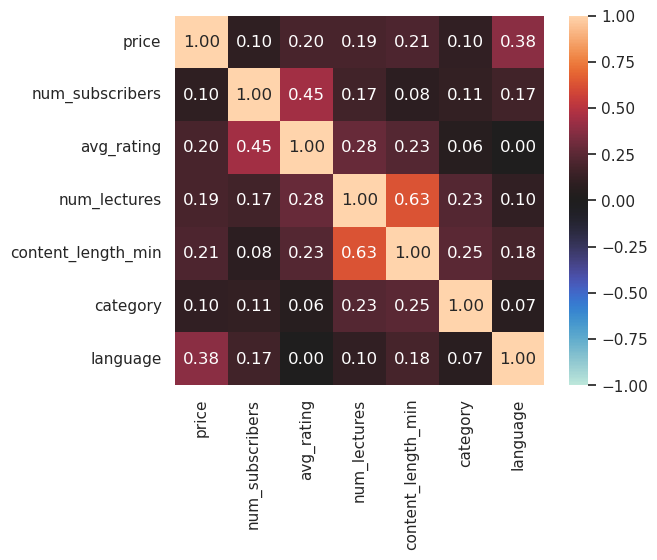

{'corr':                        price  num_subscribers  avg_rating  num_lectures  \
 price               1.000000         0.099873    0.195058      0.191610   
 num_subscribers     0.099873         1.000000    0.445208      0.167567   
 avg_rating          0.195058         0.445208    1.000000      0.284415   
 num_lectures        0.191610         0.167567    0.284415      1.000000   
 content_length_min  0.207183         0.080824    0.234067      0.630835   
 category            0.102348         0.111533    0.058472      0.227696   
 language            0.380739         0.170156    0.000000      0.101904   
 
                     content_length_min  category  language  
 price                         0.207183  0.102348  0.380739  
 num_subscribers               0.080824  0.111533  0.170156  
 avg_rating                    0.234067  0.058472  0.000000  
 num_lectures                  0.630835  0.227696  0.101904  
 content_length_min            1.000000  0.249878  0.183872  
 category 

In [11]:
# generate catergorical vs numerical data
nominal.associations(RemovedOutlierDataset)

In [12]:
RemovedOutlierDataset.describe()

,price,num_subscribers,num_lectures,content_length_min
count,130153.000000,130153.000000,130153.000000,130153.000000
mean,65.790452,378.399822,25.471768,173.333346
std,61.997021,598.890567,19.561233,143.732706
min,0.100000,1.000000,0.000000,0.000000
25%,19.990000,18.000000,11.000000,69.000000
50%,39.990000,95.000000,20.000000,129.000000
75%,94.990000,444.000000,35.000000,238.000000
max,269.990000,2875.000000,95.000000,694.000000
